In [71]:
import time

import mysql.connector
from Params import hostSQL, userSQL, passwdSQL, databaseSQL
import os
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

import nltk
from nltk.corpus import stopwords

# --------------------------------------------------
 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# --------------------------------------------------
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)



In [4]:

mydb = mysql.connector.connect(
    host=hostSQL,
    user=userSQL,
    passwd=passwdSQL,
    auth_plugin='mysql_native_password',
    database=databaseSQL
)

mycursor = mydb.cursor()


In [5]:
sql = 'SELECT * FROM chatroom'
mycursor.execute(sql)
chatlog = mycursor.fetchall()

sql = 'DESCRIBE chatroom'
mycursor.execute(sql)
chatDescribe = mycursor.fetchall()

columns = []
for i in chatDescribe:
    columns.append(i[0])

df = pd.DataFrame(chatlog, columns=columns)

df['chat_line'] = df.chat_line.str[:-1]



In [278]:

stop_words = stopwords.words('english')

stop_words.extend([
    'liv',
    'im',
    'nicole',
    'heyits127joepuckers',
    'hottea1dab',
    'mercywing2',
    'mercywing1',
    'trae',
    'leylaphype',
    'leylapmario',
    'mariioo007',
    'leylaplove',
    'leylakatana',
    'footpics23',
    'rpgghosto',
    'kill199023',
    'slawscare',
    'eclairehyperbruh',
    'traebear',
    'ajvielul',
    'bryce',
    'pansexualpride',
    'hottea1tier1',
    'hottea1hottea',
    'jaina',
    'andyraemodlove',
    'lylythfaire',
    'ajvieflex',
    'leylapcozy',
    'leylaplurk',
    'evelyn',
    'cass',
    'mrandyp',
    'fizzle27',
    'laribump',
    'fbcatch',
    'evelique',
    'bankshot1321',
    'meg',
    'ellen',
    'james',
    'yogii',
    'lari',
    'livstixs',
    'bandslam',
    'hot_tea101',
    'araynebow',
    'nice'
])

stop_words.extend(dfChat.display_name.unique().tolist())

channels = [
            # 'ajvie',
            # 'ayytrae',
            'child_of_christ666',
            # 'davinityyy',
            # 'emandliv',
            # 'hollytwolf',
            'hottea',
            'kneecoleslaw',
            # 'laribug',
            # 'leyla',
            # 'livstixs',
            'lizelda',
            'martinimonsters'
            'miss_angeliquew',
            # 'misdelish',
            # 'nataagataa',
            # 'officialevelynclaire',
            # 'pink_sparkles',
            # 'xoaeriel',
            # 'yogiibutt'
            ]


dfChat = df[df.chatchannel.isin(channels)]

dfChat = dfChat[dfChat['display_name'] != 'nightbot']

renameDict = {'chat_line': 'text'}
dfChat.rename(columns=renameDict, inplace=True)

data = dfChat.text.tolist()

In [279]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer

porter=PorterStemmer()

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

for i in range(len(data)):
    data[i] = stemSentence(data[i])

vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(data)


np.random.seed(200)

clusters = 30
model = KMeans(n_clusters=clusters, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

dfChat = dfChat.reset_index()

labels = pd.DataFrame(model.labels_, columns=['label'])

dfChatwLabels = pd.concat([dfChat.iloc[:,1:], labels], axis=1)

dfChatwLabels.groupby(['label']).count()

,from_ID,display_name,text,sent_at,chatchannel
label,,,,,
0,2,2,2,2,2
1,1,1,1,1,1
2,193,193,193,193,193
3,18450,18450,18450,18450,18450
4,24,24,24,24,24
5,188,188,188,188,188
6,133,133,133,133,133
7,128,128,128,128,128
8,376,376,376,376,376


In [280]:
for i in range(clusters):
    print('Cluster %d:' % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Cluster 0:
 prepar
 test
 question
 dumb
 zzzz
 funniest
 furiou
 furia
 furb
 fuq
Cluster 1:
 strik
 counter
 overwatch
 earlier
 wrong
 realli
 wa
 like
 thi
 funnyyyy
Cluster 2:
 oh
 wow
 god
 shit
 boy
 yeah
 lul
 thi
 uh
 see
Cluster 3:
 lol
 lul
 like
 http
 thi
 clap
 hello
 follow
 go
 instagram
Cluster 4:
 delet
 messag
 vod
 whi
 mod
 wa
 stuck
 pickl
 surpris
 thx
Cluster 5:
 pickl
 move
 gang
 hater
 pleas
 titti
 presid
 power
 wheel
 picklepickl
Cluster 6:
 dog
 piano
 play
 give
 walk
 look
 know
 rosco
 video
 gay
Cluster 7:
 naughti
 public
 hang
 join
 open
 discord
 us
 today
 come
 http
Cluster 8:
 love
 youvichoo
 youichoo
 youu
 thi
 vicho
 nicol
 boob
 wheel
 youuu
Cluster 9:
 hey
 nicol
 beauti
 gorgeou
 boob
 joel
 lise
 hotti
 tea
 liz
Cluster 10:
 pogchamp
 subscrib
 row
 month
 time
 cumback
 x5
 601
 juici
 shot
Cluster 11:
 ok
 sorri
 oh
 wa
 cool
 hope
 simp
 bud
 make
 lol
Cluster 12:
 know
 dont
 thi
 let
 wa
 get
 whi
 song
 like
 mean
Cluster 13:
 omg

In [281]:
testMsg = ['ur a simp']

testMsg = [stemSentence(testMsg[0])]

print('Prediction')
X = vectorizer.transform(testMsg)
predicted = model.predict(X)
print(predicted)

dfChatwLabels[dfChatwLabels['label'] == predicted[0]].text.tolist()

Prediction
[3]


G fatguy3FG',
 'i was here',
 'fatguy3Nohear fatguy3Nohear fatguy3Nohear fatguy3Nohear fatguy3Nohear',
 'pugWM pugWM pugWM pugWM pugWM pugWM pugWM pugWM pugWM pugWM pugWM pugWM pugWM pugWM',
 'YES',
 'LUL',
 'asmr yesss',
 'LUL',
 'mommy',
 'i mean maybe',
 'I saw a bee enter your cleavage slawScare take it off!',
 'LOL',
 'kaceyHEH kaceyHEH kaceyHEH',
 'LOL',
 'slawShook',
 'LOL',
 'a bug invisible to girls',
 "That's awkward xD",
 'pugHey pugHey pugHey pugHey pugHey pugHey pugHey pugHey pugHey pugHey pugHey pugWMA',
 'sumMhm sumMhm sumMhm',
 'OMEGALUL',
 'Sage might be amazing for you, Nicole.',
 'whats the go about the stimulus check graphic?',
 'kaypikeHeyGuys',
 'classic girl stream... gameplay secondary mini screen, b33bz main focus OMEGALUL',
 'Follow kneecoleslaw on instagram at http',
 'WE NEED THE KEY',
 'Can you make the gameplay a bit smaller',
 'that view was better!',
 'too many thirsty fuckers in here',
 'what?',
 'hows that thirsty',
 'it was better gameplay ion give a 

In [282]:
clusterNum = 3

dfChatwLabels[dfChatwLabels['label'] == clusterNum].text.tolist()

G fatguy3FG',
 'i was here',
 'fatguy3Nohear fatguy3Nohear fatguy3Nohear fatguy3Nohear fatguy3Nohear',
 'pugWM pugWM pugWM pugWM pugWM pugWM pugWM pugWM pugWM pugWM pugWM pugWM pugWM pugWM',
 'YES',
 'LUL',
 'asmr yesss',
 'LUL',
 'mommy',
 'i mean maybe',
 'I saw a bee enter your cleavage slawScare take it off!',
 'LOL',
 'kaceyHEH kaceyHEH kaceyHEH',
 'LOL',
 'slawShook',
 'LOL',
 'a bug invisible to girls',
 "That's awkward xD",
 'pugHey pugHey pugHey pugHey pugHey pugHey pugHey pugHey pugHey pugHey pugHey pugWMA',
 'sumMhm sumMhm sumMhm',
 'OMEGALUL',
 'Sage might be amazing for you, Nicole.',
 'whats the go about the stimulus check graphic?',
 'kaypikeHeyGuys',
 'classic girl stream... gameplay secondary mini screen, b33bz main focus OMEGALUL',
 'Follow kneecoleslaw on instagram at http',
 'WE NEED THE KEY',
 'Can you make the gameplay a bit smaller',
 'that view was better!',
 'too many thirsty fuckers in here',
 'what?',
 'hows that thirsty',
 'it was better gameplay ion give a 

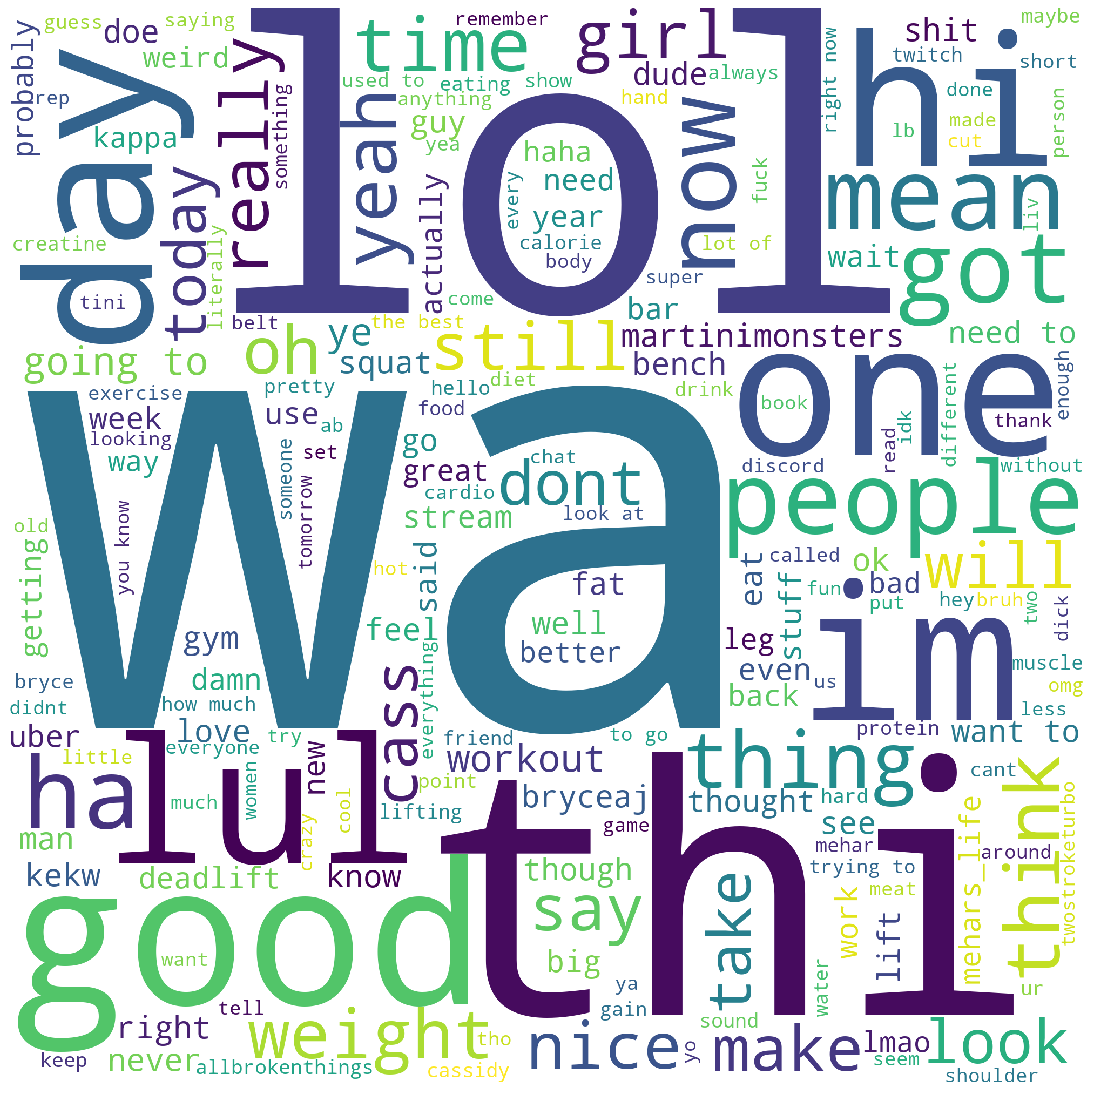

In [4]:
martonoChat = df[df['chatchannel'] == 'martinimonsters']

from wordcloud import WordCloud, STOPWORDS

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in martonoChat.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 2000, height = 2000, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (15, 15), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 